In [2]:
%matplotlib inline

import os
os.environ['CUDA_VISIBLE_DEVICE'] = '2'

import torch
import torch.nn as nn

from settings import visible_gpus
from networks.pose_feature_net import PoseFeatureNet



pose_feature_net = PoseFeatureNet()
pose_feature_net = torch.nn.DataParallel(pose_feature_net).cuda()
print ('pose_feature_net --> num_stacks?', pose_feature_net.module.num_stacks)

pose_feature_net

('pose_feature_net --> num_stacks?', 8)


DataParallel (
  (module): PoseFeatureNet (
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (relu): ReLU (inplace)
    (layer1): Sequential (
      (0): Bottleneck (
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
        (conv3): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
        (relu): ReLU (inplace)
        (downsample): Sequential (
          (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
        )
      )
    )
    (layer2): Sequential (
      (0): Bottleneck (
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
        (conv1): Conv2d(128, 128,

Loading pickle: /home/ubuntu/cvlab/pytorch/Sub-JHMDB_pose_stream/get_train_test_split/dic_train.pickle ...
('images size?', torch.Size([8, 3, 256, 256]))

('features type?', <type 'list'>)
('features len?', 8)
('per stack estimation type?', <class 'torch.autograd.variable.Variable'>)

('features_numpy type?', <type 'numpy.ndarray'>)
('features_numpy.shape', (8, 16, 64, 64))


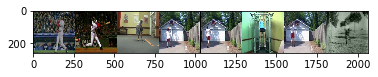

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable

from utils.datasets import jhmdb
from utils import pickle_tools



def my_imshow(img):
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))

jhmdb_dict_path = '/home/ubuntu/cvlab/pytorch/Sub-JHMDB_pose_stream/get_train_test_split/dic_train.pickle'
jhmdb_dict = pickle_tools.load_pickle(jhmdb_dict_path)

jhmdb_rgb_root = '/home/ubuntu/data/JHMDB/Rename_Images'
train_set = jhmdb.JhmdbRgbData(jhmdb_dict, jhmdb_rgb_root, transform=transforms.Compose([
                transforms.Scale([256, 256]),
                transforms.ToTensor()
                ]))

train_loader = torch.utils.data.DataLoader(train_set, batch_size=8, shuffle=False, num_workers=2)

# get some training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
my_imshow(torchvision.utils.make_grid(images))
print('images size?', images.size())
print

# try using pose_feature_net to extract feature
features = pose_feature_net(Variable(images))
print('features type?', type(features))
print('features len?', len(features))
print('per stack estimation type?', type(features[0]))
print

features_numpy = features[-1].data.cpu().numpy()
print('features_numpy type?', type(features_numpy))
print('features_numpy.shape', features_numpy.shape)


/home/ubuntu/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


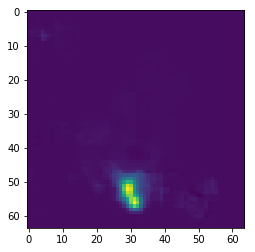

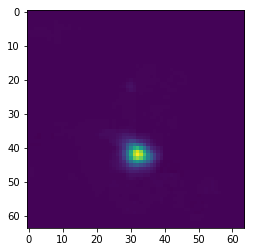

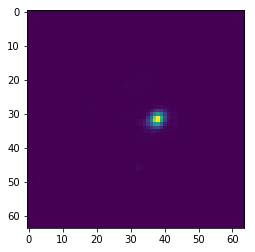

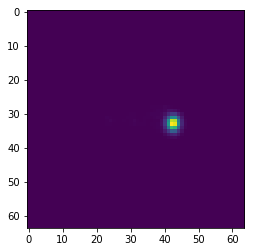

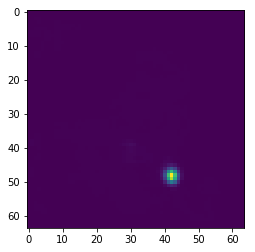

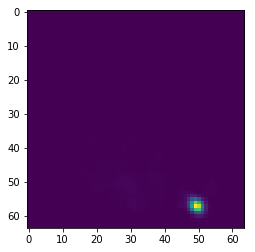

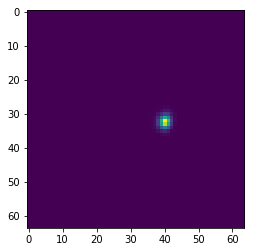

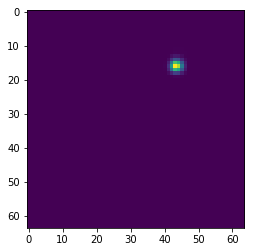

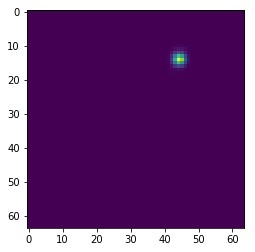

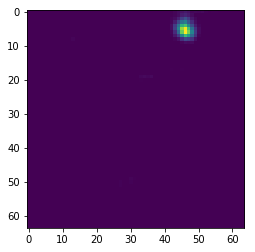

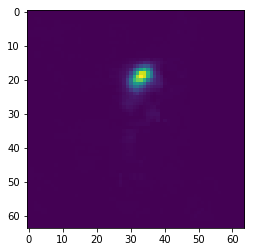

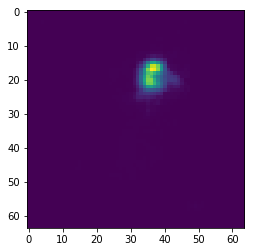

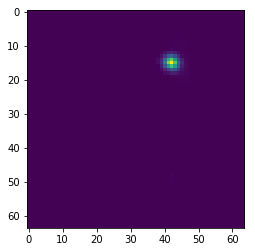

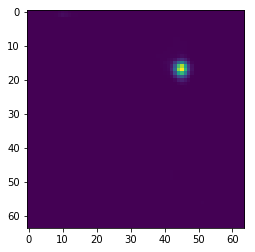

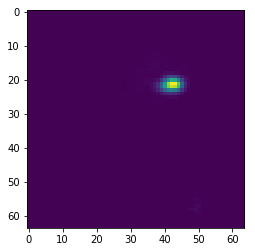

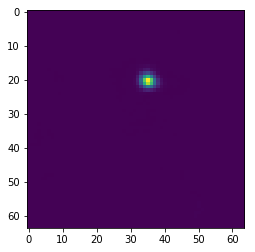

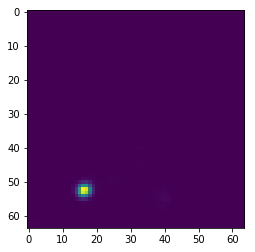

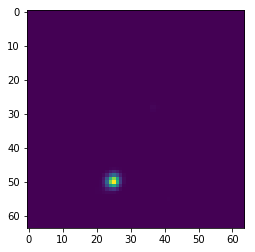

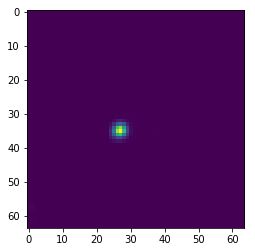

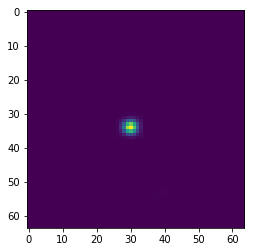

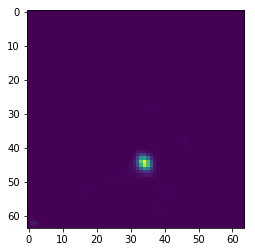

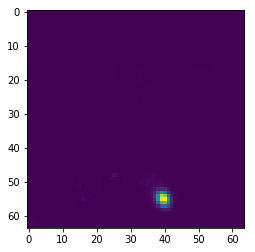

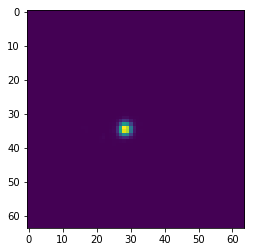

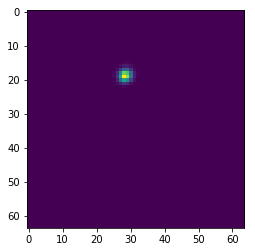

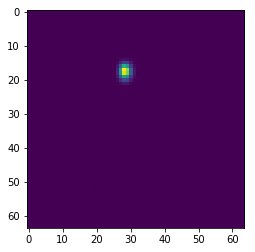

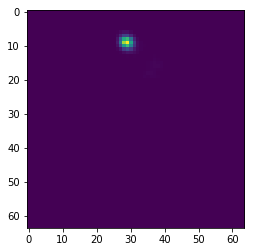

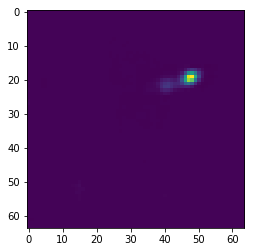

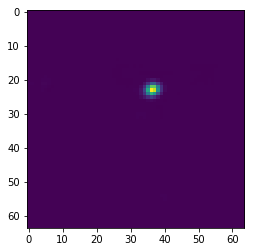

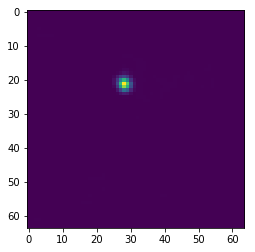

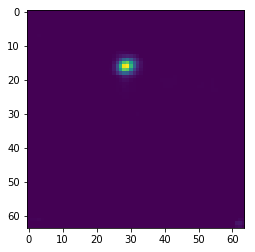

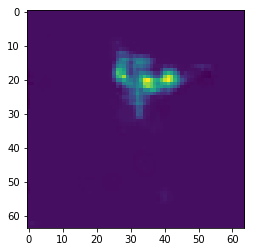

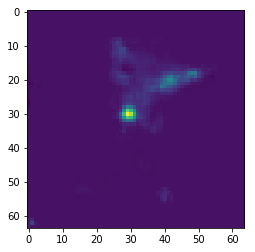

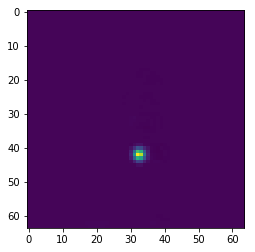

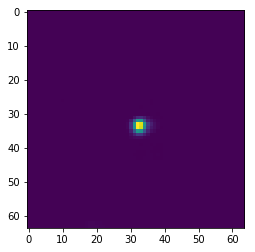

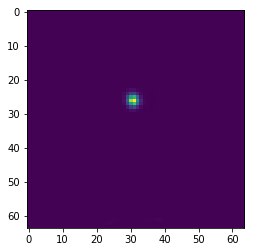

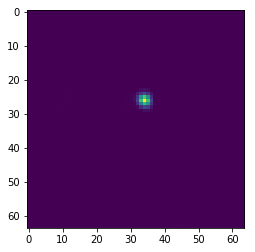

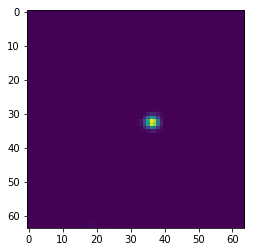

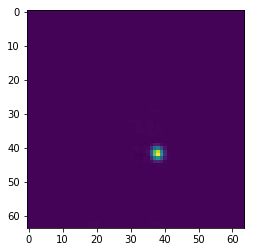

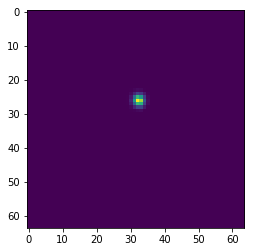

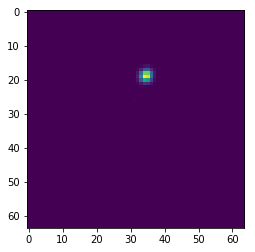

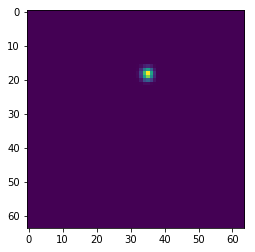

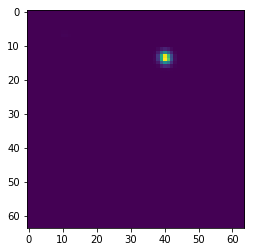

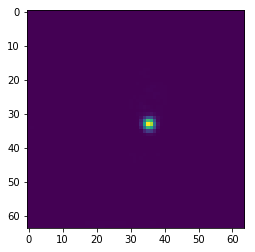

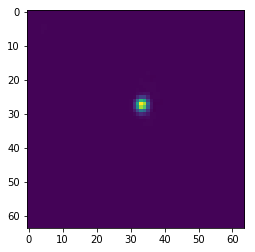

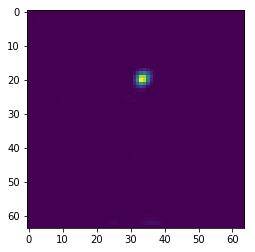

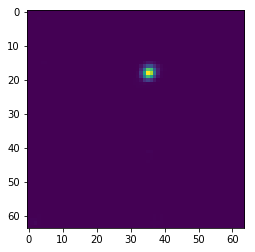

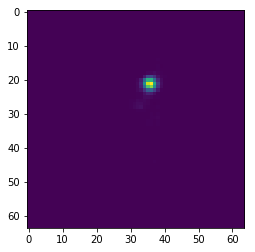

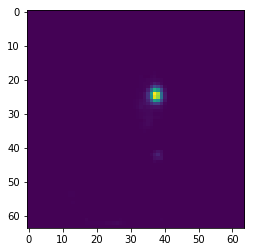

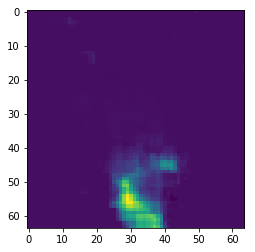

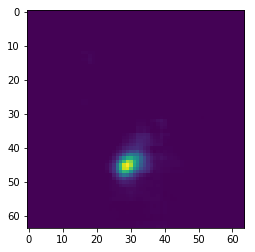

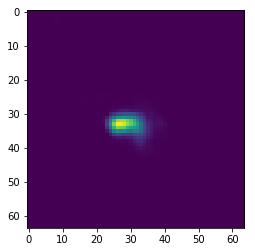

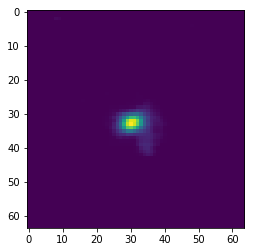

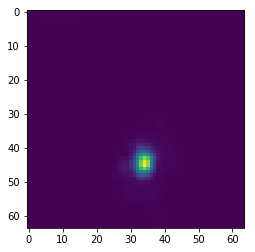

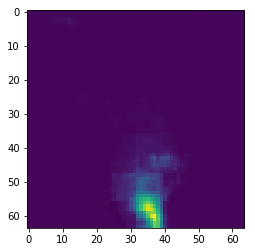

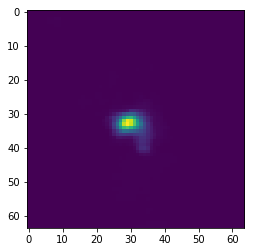

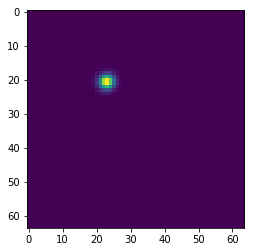

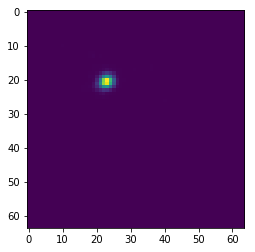

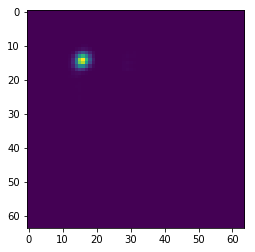

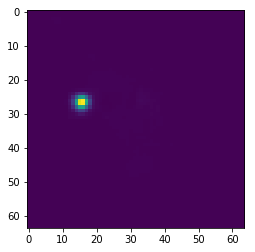

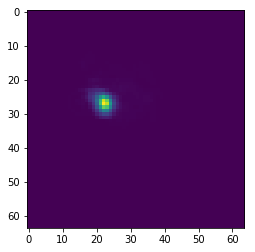

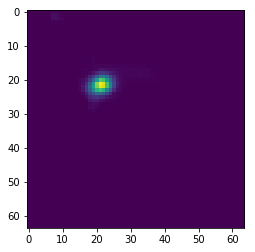

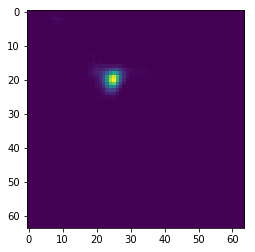

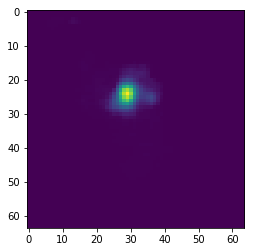

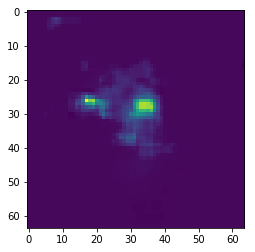

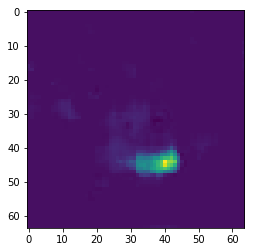

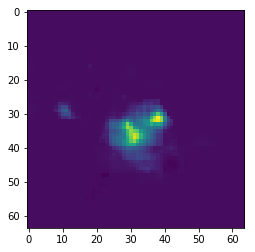

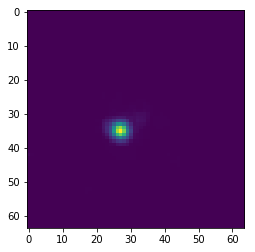

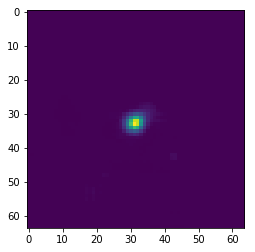

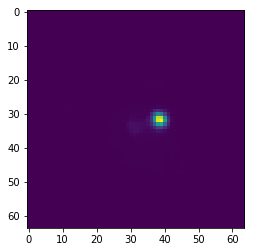

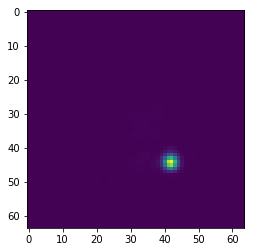

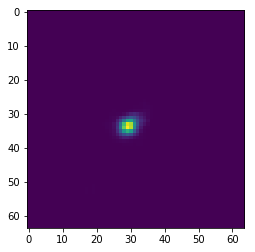

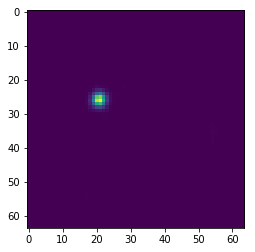

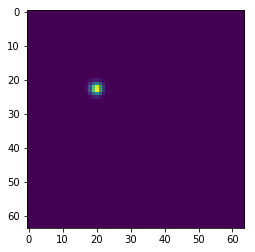

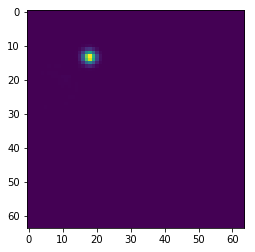

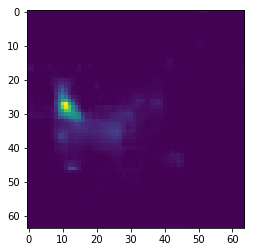

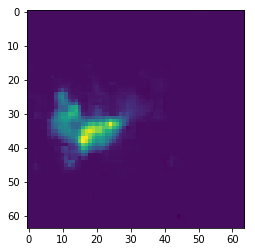

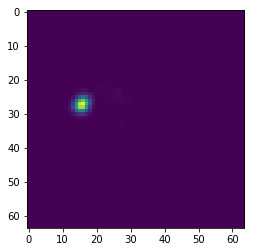

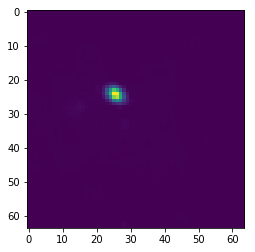

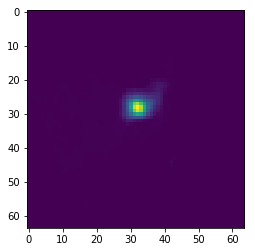

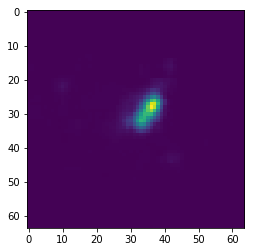

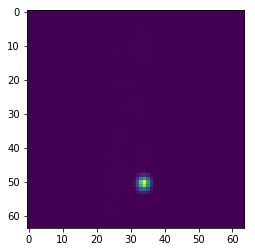

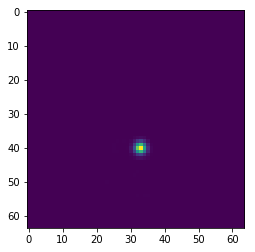

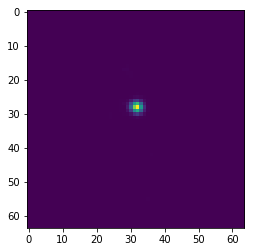

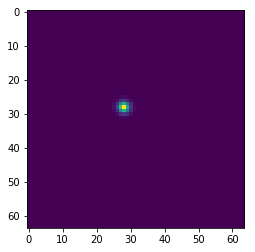

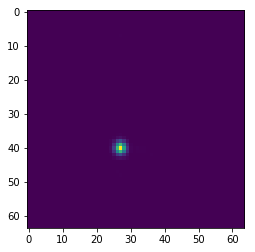

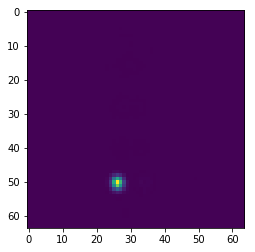

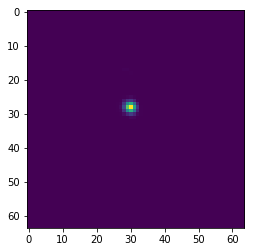

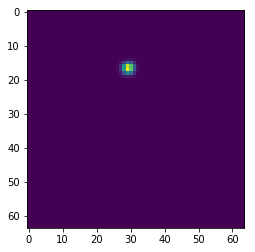

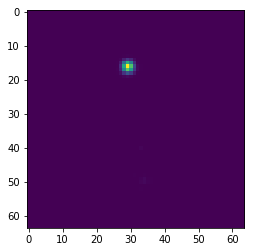

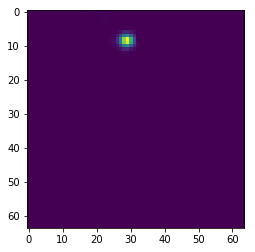

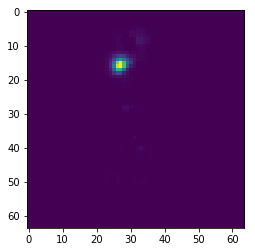

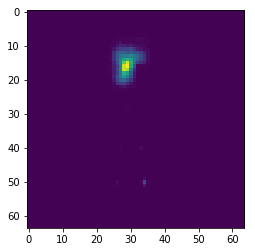

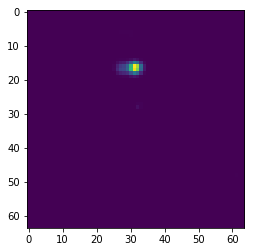

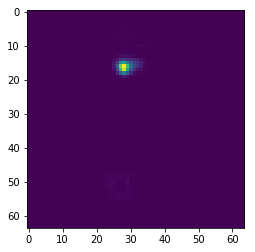

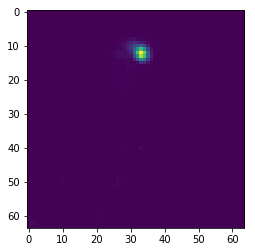

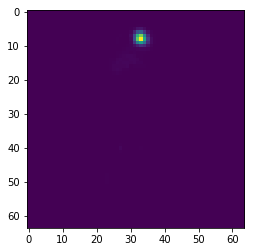

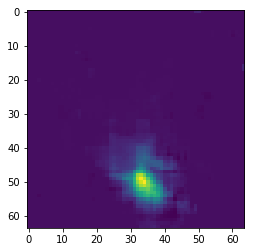

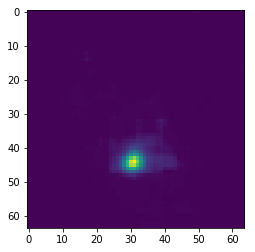

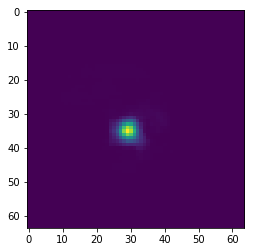

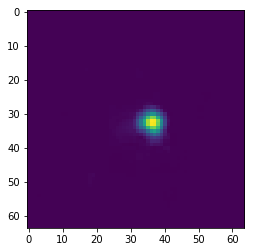

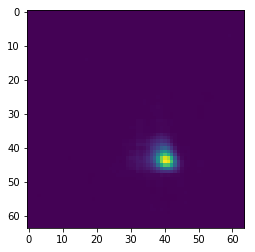

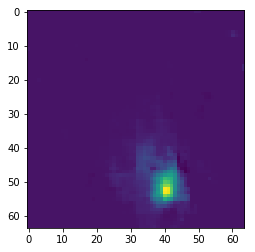

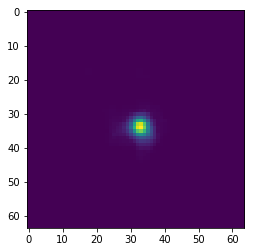

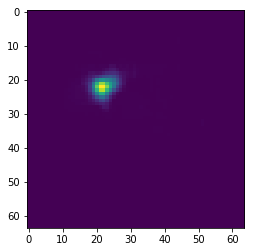

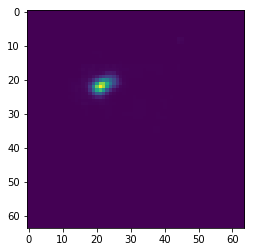

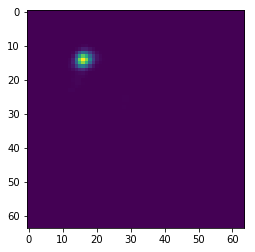

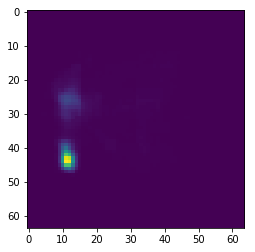

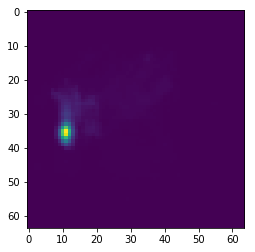

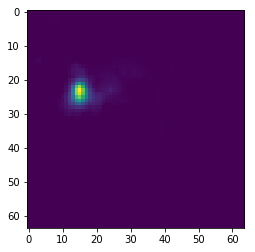

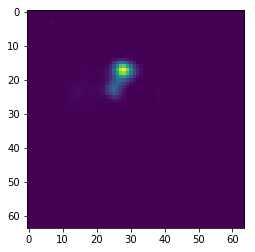

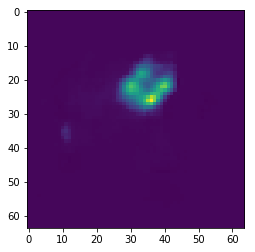

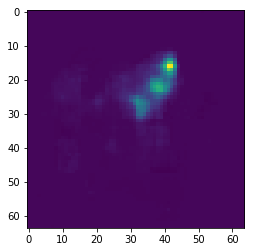

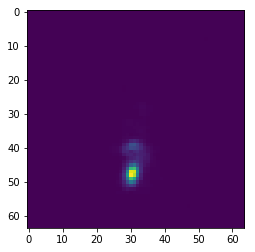

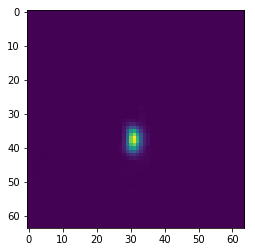

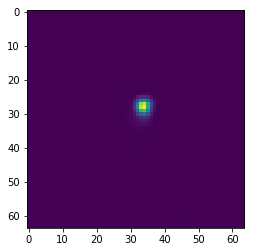

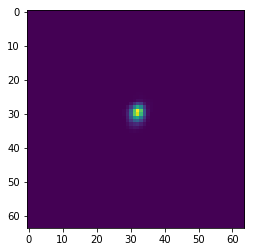

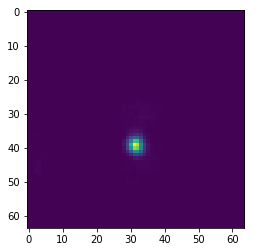

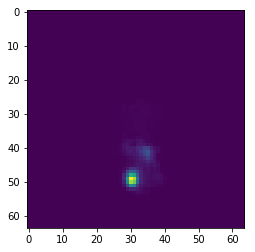

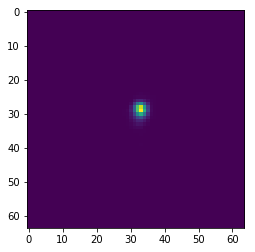

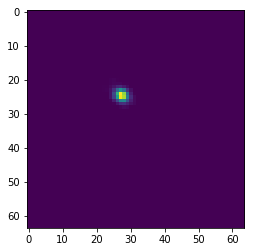

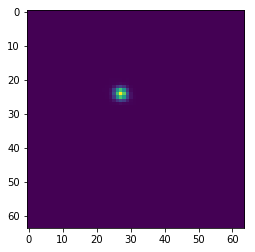

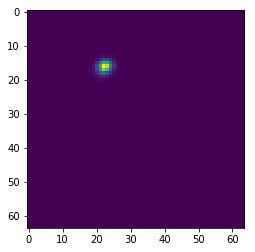

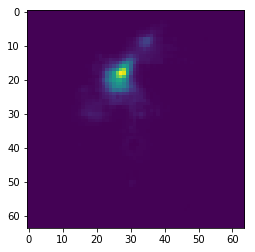

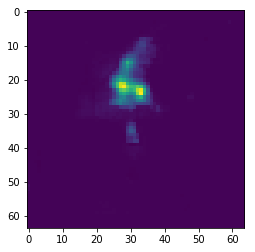

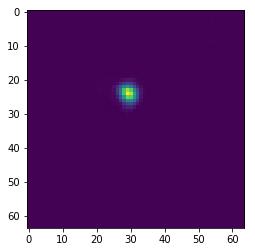

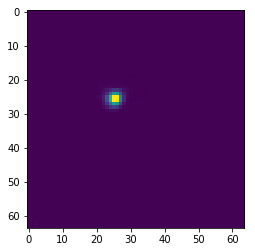

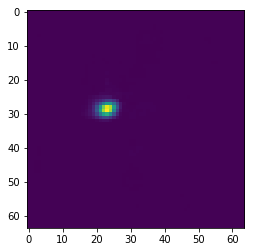

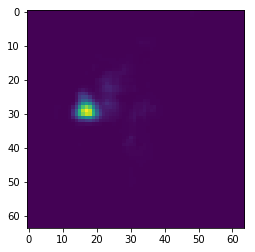

In [3]:
from matplotlib.pyplot import imshow

# display pose feature maps
for i in range(features_numpy.shape[0]):
    feature_numpy = features_numpy[i, :, :, :]
    for c in range(feature_numpy.shape[0]):
        channel = feature_numpy[c, :, :]
        plt.figure()
        imshow(channel)


In [4]:
from networks.pose_stream_net import PoseStreamNet


num_classes = 12

# try using pose_stream_net to predict action class label
pose_stream_net = PoseStreamNet(num_classes)
pose_stream_net = torch.nn.DataParallel(pose_stream_net).cuda()

predicts = pose_stream_net(Variable(images))
print('predicts type?', type(predicts))

predicts_numpy = predicts.data.cpu().numpy()
print('predicts_numpy type?', type(predicts_numpy))
print('predicts_numpy.shape', predicts_numpy.shape)
predicts_numpy


('predicts type?', <class 'torch.autograd.variable.Variable'>)
('predicts_numpy type?', <type 'numpy.ndarray'>)
('predicts_numpy.shape', (8, 12))


array([[ 0.54170465,  1.02688706,  0.66837168,  0.48690605,  0.31692231,
        -0.97264886,  1.24800098,  0.14600858, -0.05532726, -0.00228876,
         0.20816721, -0.24917226],
       [ 0.47444388,  0.98075265,  0.59847778,  0.64176565, -0.23599902,
        -1.37890232,  1.34567595,  0.05561273,  0.10084993,  0.40288875,
        -0.29108149, -0.31435975],
       [ 0.59368891,  0.83184302,  0.45287907,  1.17577624,  0.25304654,
        -1.04426241,  1.77795804,  0.27287263,  0.14295387,  0.31511134,
        -0.32491976, -0.08179522],
       [ 0.79628575,  0.45100382,  1.03801858,  0.09815701,  0.26304701,
        -0.77853554,  1.06248331, -0.36242703, -0.30581719, -0.07200547,
        -0.62427443, -0.66928816],
       [ 0.38585982,  2.02976656,  1.04873908,  1.44106734, -0.48678324,
        -0.57200056,  1.484676  ,  0.5723139 ,  0.55827636,  0.58571064,
        -0.37966377, -1.14086258],
       [ 2.1212945 ,  1.77311683,  1.04240048,  0.94742346, -0.07338806,
        -1.3650099 ,  